Problem 1
--

setup

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
DEFAULT_FIGSIZE = (48,18)
plt.rc("figure", figsize=DEFAULT_FIGSIZE)
plt.rc("font", size=48)

def plot(s, y=DEFAULT_FIGSIZE):
    #figsize(y=y)
    fig, ax = plt.subplots(1, 1)
    if isinstance(s, pd.Series):
        s.plot(ax=ax, legend=False, color=["orange"])
    else:
        s.plot(ax=ax, legend=False)
        fig.legend(frameon=False)
    
    ax.set_xlabel(None)
    ax.set_xlim(s.index[0], s.index[-1]) #s.index[0]
    sns.despine()
    fig.tight_layout(pad=1.0)
    #figsize()

In [302]:
prices = pd.read_csv("mfe-formal-work-1-2020-2021.csv.gz", index_col="time",
compression="infer") 
prices.columns = pd.to_datetime(prices.columns)
ln_p = np.log(prices)
returns = (prices.diff()/prices).dropna()

In [303]:
##daily_rets = ((prices.iloc[-1] - prices.iloc[0])*100)/prices.iloc[0]
cto =  ((prices.iloc[-1].shift(1)  - prices.iloc[0])*100 / prices.iloc[-1].shift(1))**2
cto
# does this need to be estimated for the estimations?

2011-01-03         NaN
2011-01-04    0.146217
2011-01-05    0.384408
2011-01-06    0.050000
2011-01-07    0.145206
                ...   
2020-12-25    0.013257
2020-12-28    0.001433
2020-12-29    0.684422
2020-12-30    0.035537
2020-12-31    0.041501
Length: 2609, dtype: float64

In [304]:
 daily_rets = prices.iloc[-1].pct_change().dropna() * 100
 daily_rets

2011-01-04   -0.467046
2011-01-05    1.679419
2011-01-06   -0.014273
2011-01-07   -0.728810
2011-01-10    0.465741
                ...   
2020-12-25   -0.880606
2020-12-28   -1.061383
2020-12-29   -1.502617
2020-12-30   -0.203523
2020-12-31   -0.048662
Name: 57600, Length: 2608, dtype: float64

Question 1 and 2

In [305]:

m = 23400
rv = {}

samp = [23400, 11700,  7800,  5850,  4680,  3900,  2925,  2600,  2340,
        1950,  1800,  1560,  1300,  1170,   975,   936,   900,   780,
         650,   600,   585,   520,   468,   450,   390,   360,   325,
         312,   300,   260,   234,   225,   200,   195,   180,   156,
         150,   130,   120,   117,   104,   100,    90,    78,    75,
          72,    65,    60,    52,    50,    45,    40,    39,    36,
          30,    26,    25,    24,    20,    18,    15,    13]

for i in samp:
    step = m // i
    _rv = ((ln_p.iloc[::step].diff().dropna()*100)**2).sum()
    rv[step] = _rv
rv = pd.DataFrame(rv)

In [306]:
robust_rv = {}
check_rv = {}
m = 23400
for i in samp:
    step = m // i
    r = ln_p[::step].diff().dropna()
    _rv = (r**2).sum(0) + 2 * (r[:-1]*r[1:]).sum(0)
    robust_rv[step] = _rv
    check_rv[step] = (r**2).sum(0) 
rv_ac1 = pd.DataFrame(robust_rv)

In [307]:
p = np.log(np.asarray(prices))

samp = [23400, 11700,  7800,  5850,  4680,  3900,  2925,  2600,  2340,
        1950,  1800,  1560,  1300,  1170,   975,   936,   900,   780,
         650,   600,   585,   520,   468,   450,   390,   360,   325,
         312,   300,   260,   234,   225,   200,   195,   180,   156,
         150,   130,   120,   117,   104,   100,    90,    78,    75,
          72,    65,    60,    52,    50,    45,    40,    39,    36,
          30,    26,    25,    24,    20,    18,    15,    13]
prices_vsp = {}
prices_vsp_ac1 = {}
for s in samp:
    step = 23400 // s
    _p = p[::step]
    r = _p[1:] - _p[:-1]
    prices_vsp[s] = pd.Series((r**2).sum(0)).mean(0)
    prices_vsp_ac1[s] = pd.Series((r**2).sum(0) + 2 * (r[1:]*r[:-1]).sum(0)).mean(0)
prices_vsp = pd.Series(prices_vsp)
prices_vsp_ac1 = pd.Series(prices_vsp_ac1)

In [308]:
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt


def plot_rv(realised_variance):
    rv_new = pd.DataFrame([realised_variance[1],realised_variance[15],realised_variance[60],realised_variance[300],realised_variance[600],realised_variance[1800]]).T
    #plt
    fig,ax = plt.subplots(1,1,figsize=(16,6))
    ax = rv_new.boxplot(ax=ax,whis=25)
    ax.set_xlabel("Period")
    xl = ax.get_xticklabels()
    _ = ax.set_xticklabels(["1 sec", "15 sec", "60 sec", "5 min", "10 min", "30 min"])

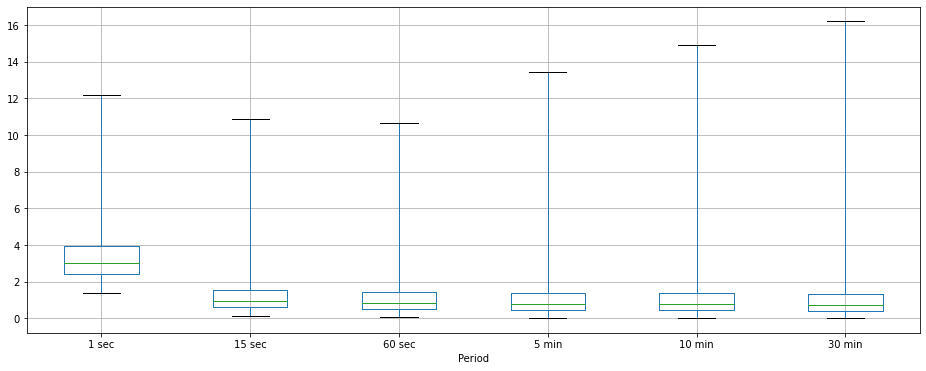

In [309]:
plot_rv(rv)

In [310]:
def plot_vsp(zoom=False):
    df = pd.concat([prices_vsp, prices_vsp_ac1],1)
    df.columns = ["$RV$", "$RV^{AC1}$"]
    df.index = 23400 // df.index
    if zoom:
        df=df.iloc[df.index <= 60]
    plt.figure(figsize=(16,8))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.plot(np.log(df))
    ax = plt.gca()
    ax.legend(df.columns, fontsize=14)
    for l in ax.lines:
        l.set_linestyle("none")
        l.set_marker("o")
        l.set_markersize(10)

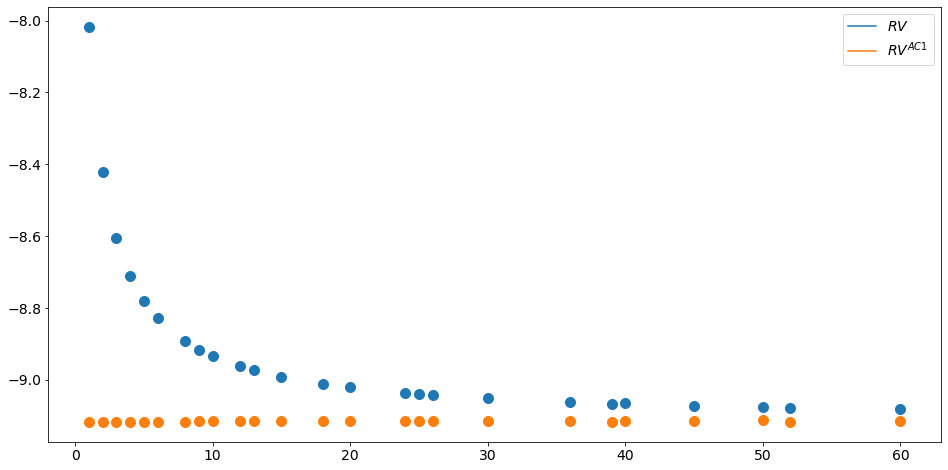

In [311]:
#BIG GRAPH TO HAVE IN Q 1 and Q2 sorted
plot_vsp(zoom=True)

In [312]:
#def vsp():
#def plot_rv():
def vsp(dframe,zoom=False):
    mean_rv = np.log(dframe).mean(0)
    mean_rv.name="Avg. Log RV"
    ax = plt.gca()
    ax.plot(mean_rv)
    ax.plot(np.log(dframe).T)
    for l in ax.lines[1:]:
        l.set_color("gray")
        l.set_linewidth(1.5)
        l.set_zorder(-3)
    if zoom:
        ax.set_xlim((dframe.T).index[0], 120)
    else:
        ax.set_xlim((dframe.T).index[0],(dframe.T).index[-1]) 

In [313]:
test_rv = defaultdict(list)
mu = 0.08
rg = np.random.default_rng(20210223)
sigma = .2
m = 23400
sp = 0.02
samp = [23400, 11700,  7800,  5850,  4680,  3900,  2925,  2600,  2340,
        1950,  1800,  1560,  1300,  1170,   975,   936,   900,   780,
         650,   600,   585,   520,   468,   450,   390,   360,   325,
         312,   300,   260,   234,   225,   200,   195,   180,   156,
         150,   130,   120,   117,   104,   100,    90,    78,    75,
          72,    65,    60,    52,    50,    45,    40,    39,    36,
          30,    26,    25,    24,    20,    18,    15,    13]
for j in range(100):
    e = mu/(252*m) + rg.standard_normal(23400) * np.sqrt(sigma**2 / (252 *m))
    lp = np.log(100) + np.cumsum(np.r_[0,e])
    
    mq = np.round(np.exp(lp),2)
    direct = 2*rg.integers(0,2,size=mq.shape[0])-1
    trans = mq + direct * sp
    p = np.log(trans)
    for i in samp:
        step = m // i
        _rv = (np.diff(p[::step])**2).sum()
        test_rv[step].append(_rv)
test_rv = pd.DataFrame(test_rv)

Question 4, 5 and 6 (plus some forecasting)
--

estimating the models

In [314]:
half = len(returns.T) // 2
dist = "normal"   #### 'normal', 't', 'skewt', 'ged'
half

1304

In [315]:
cto

2011-01-03         NaN
2011-01-04    0.146217
2011-01-05    0.384408
2011-01-06    0.050000
2011-01-07    0.145206
                ...   
2020-12-25    0.013257
2020-12-28    0.001433
2020-12-29    0.684422
2020-12-30    0.035537
2020-12-31    0.041501
Length: 2609, dtype: float64

In [316]:
import arch
from arch import arch_model
from arch.univariate.distribution import StudentsT
from arch.univariate import HARX

In [317]:
cto_pred = HARX(cto.dropna(), lags=[1,5,22], rescale=False).fit(last_obs=half-1,disp=False)
cto_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    HAR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:                   None   R-squared:                       0.032
Mean Model:                       HAR   Adj. R-squared:                  0.030
Vol Model:          Constant Variance   Log-Likelihood:                242.091
Distribution:                  Normal   AIC:                          -474.183
Method:            Maximum Likelihood   BIC:                          -448.406
                                        No. Observations:                 1281
Date:                Mon, Mar 15 2021   Df Residuals:                     1277
Time:                        16:41:08   Df Model:                            4
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
Const          0.0542  1.043e-02      5.194  2.058e-07  [3.373e-02,7.461e-02]
None[0:1]  6.8398e-03  4.222e-02      0.162      0.871 [-7.591e-02,8.959e-02]
None[0:5]      0.1870      0.114      1.637      0.102   [-3.694e-02,  0.411]
None[0:22]     0.2853      0.121      2.354  1.855e-02    [4.779e-02,  0.523]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
sigma2         0.0401  6.963e-03      5.762  8.299e-09 [2.647e-02,5.377e-02]
============================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

In [318]:
cto_fcast = cto_pred.forecast(align="target").mean.squeeze()
cto_fcast_5 = cto_pred.forecast(align="target",horizon=5).mean.squeeze().dropna()["h.5"]
cto_fcast_22 = cto_pred.forecast(align="target",horizon=22).mean.squeeze().dropna()["h.22"]

<class 'statsmodels.iolib.summary.Summary'>
"""
                    HAR - Constant Variance Model Results                     
==============================================================================
Dep. Variable:                     20   R-squared:                       0.341
Mean Model:                       HAR   Adj. R-squared:                  0.339
Vol Model:          Constant Variance   Log-Likelihood:               -1187.31
Distribution:                  Normal   AIC:                           2384.62
Method:            Maximum Likelihood   BIC:                           2410.40
                                        No. Observations:                 1282
Date:                Mon, Mar 15 2021   Df Residuals:                     1278
Time:                        16:44:41   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const          0.2152  5.773e-02      3.727  1.936e-04   [  0.102,  0.328]
20[0:1]        0.4077  5.198e-02      7.843  4.389e-15   [  0.306,  0.510]
20[0:5]        0.1394  7.109e-02      1.962  4.982e-02 [1.103e-04,  0.279]
20[0:22]       0.2391  7.263e-02      3.292  9.946e-04 [9.675e-02,  0.381]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
sigma2         0.3732  2.739e-02     13.627  2.756e-42 [  0.320,  0.427]
========================================================================

Covariance estimator: White's Heteroskedasticity Consistent Estimator
"""

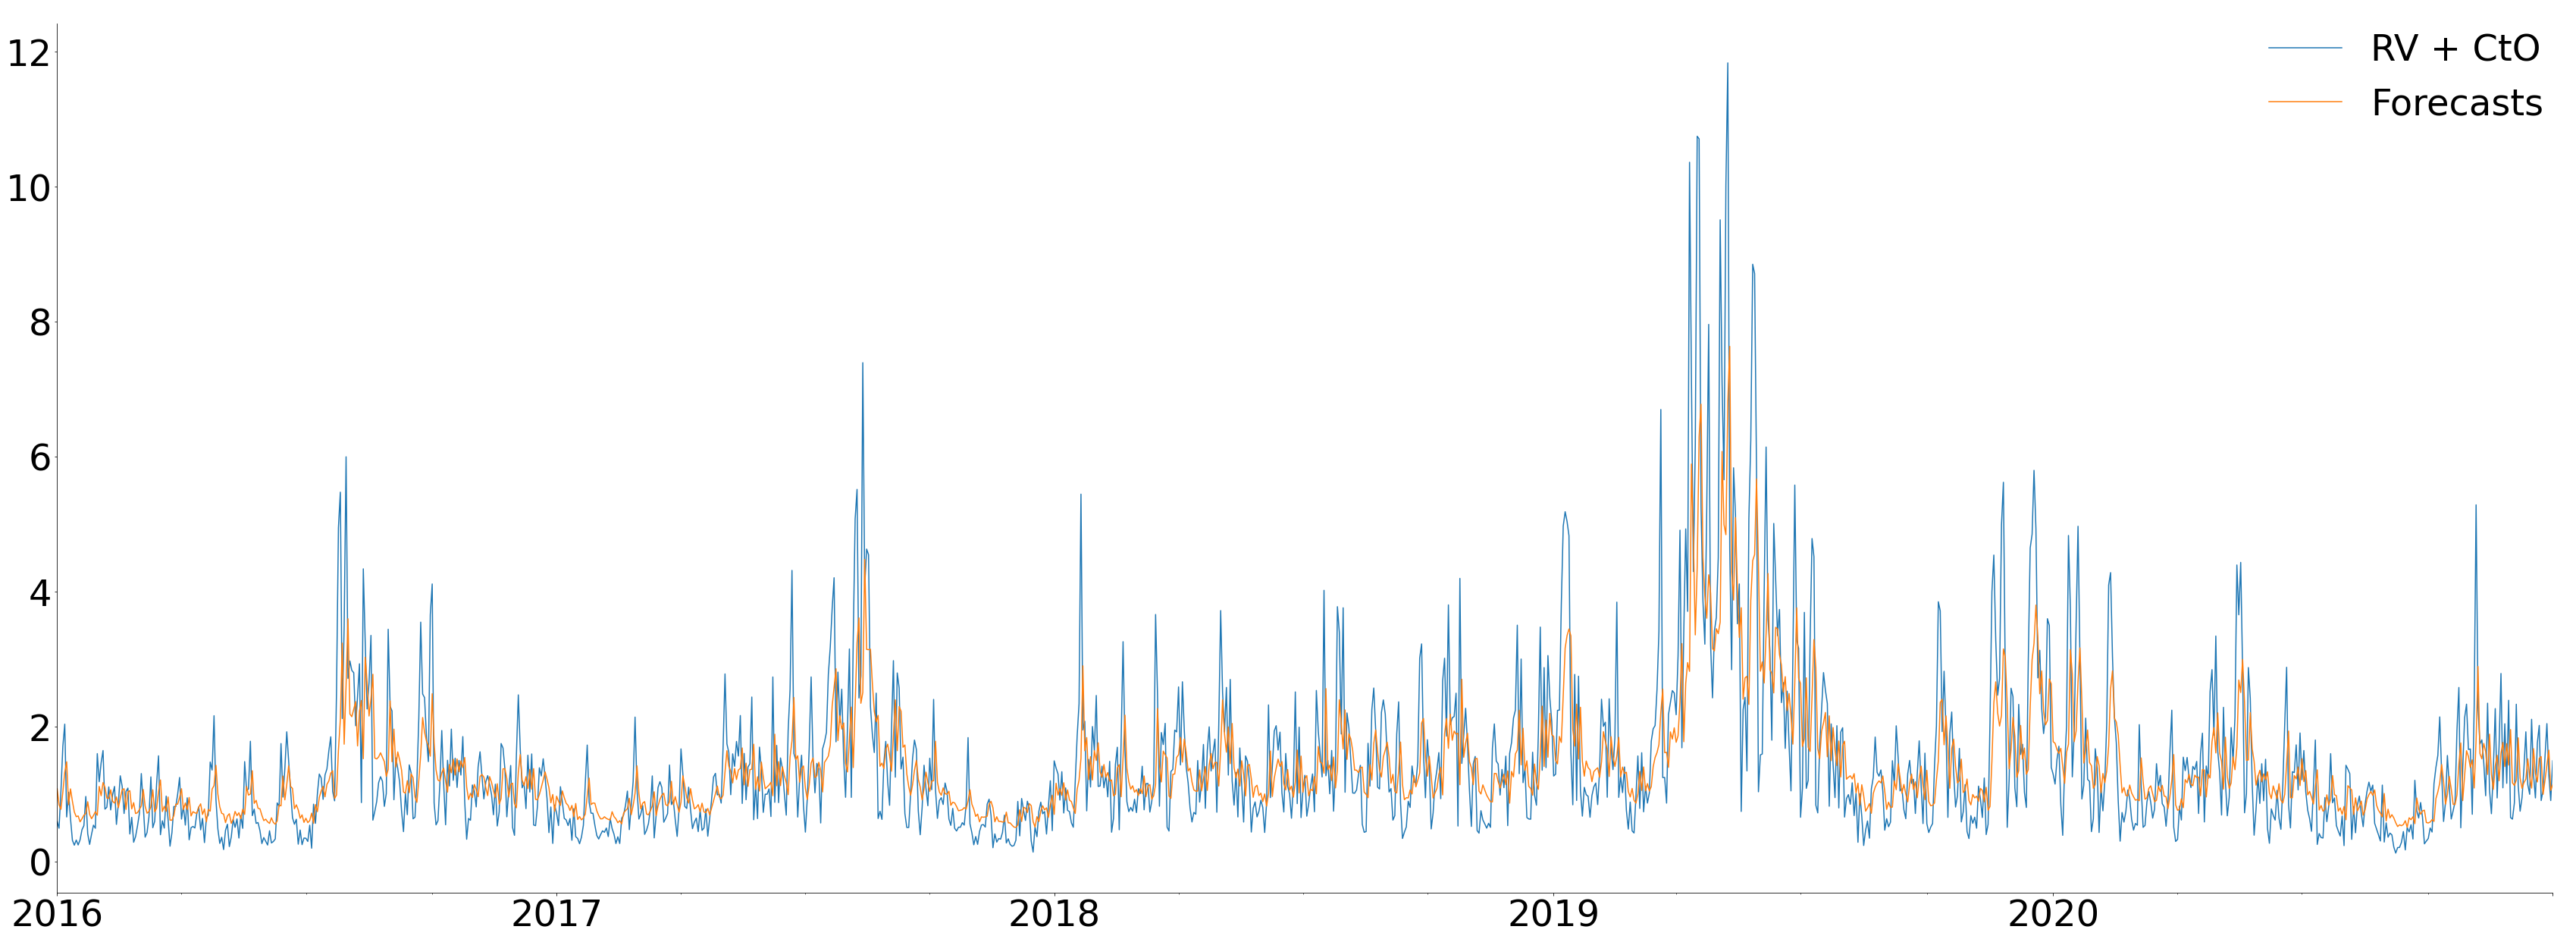

In [340]:
# Question 4: HAR
har = HARX(rv[20], lags=[1,5,22], rescale=False).fit(last_obs=half,disp=False)
har.summary()
forecasts = har.forecast(horizon=22,align="target").mean
#forecasts = np.exp(fcasts.mean + fcasts.variance/2)
comb = pd.concat([rv[20]+cto, forecasts['h.01'] + cto_fcast], 1).dropna()
comb.columns = ["RV + CtO", "Forecasts"]
plot(comb)
har.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  57600   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1865.06
Distribution:                  Normal   AIC:                           3738.11
Method:            Maximum Likelihood   BIC:                           3758.80
                                        No. Observations:                 1303
Date:                Mon, Mar 15 2021   Df Residuals:                     1302
Time:                        16:46:29   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0441  2.680e-02      1.646  9.980e-02 [-8.421e-03,9.665e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0859  5.061e-02      1.697  8.962e-02 [-1.329e-02,  0.185]
alpha[1]       0.0820  3.855e-02      2.128  3.333e-02  [6.479e-03,  0.158]
beta[1]        0.8375  7.963e-02     10.517  7.218e-26    [  0.681,  0.994]
===========================================================================

Covariance estimator: robust
"""

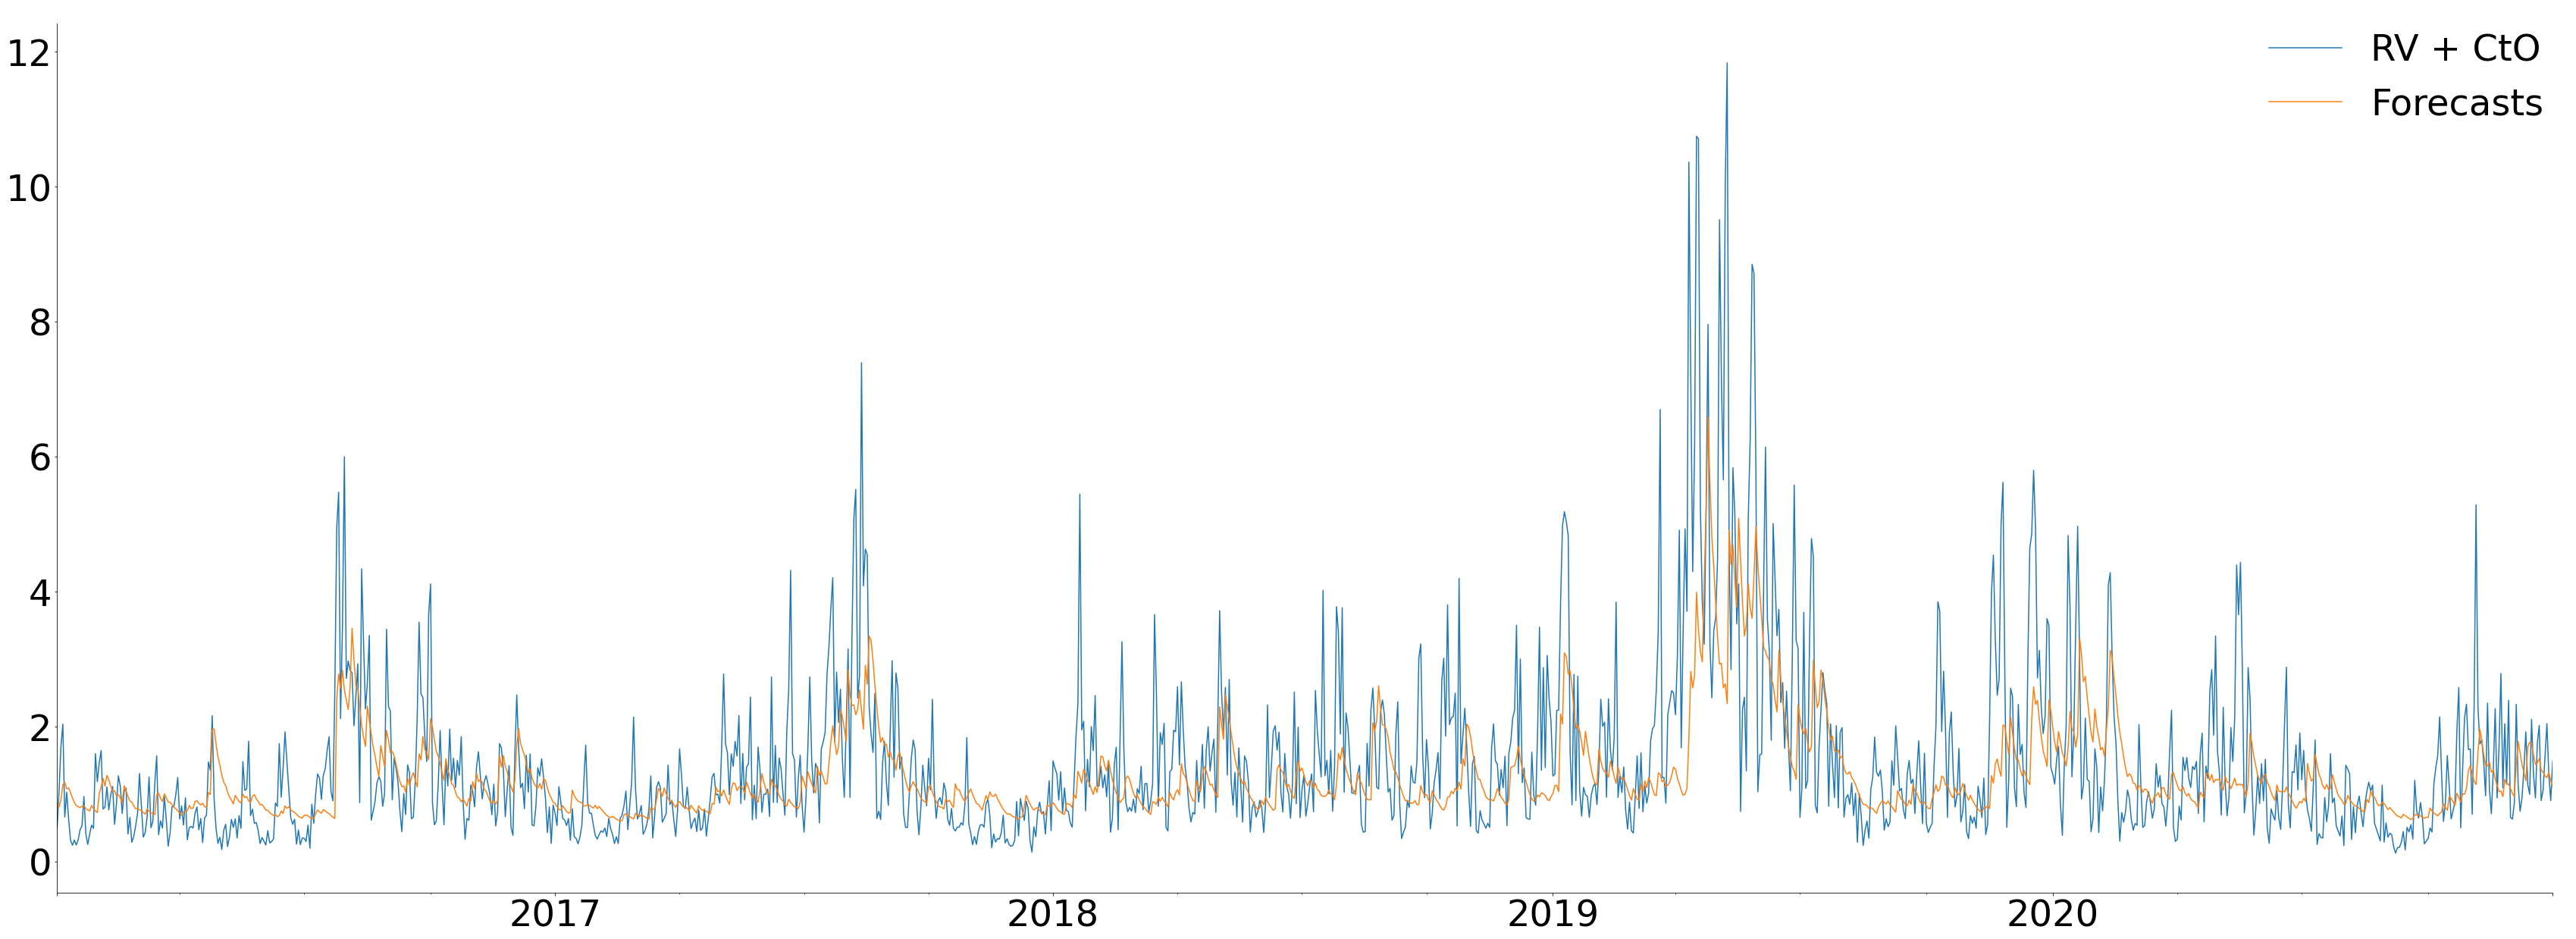

In [350]:
# Question 5, GARCH model

garch = arch_model(daily_rets, vol='garch',dist='normal').fit(last_obs=half-1,disp="off")
forecasts = garch.forecast(horizon=22, start=half).variance.dropna()
comb = pd.concat([rv[20]+cto, forecasts['h.01']], 1).dropna()
comb.columns = ["RV + CtO", "Forecasts"]
plot(comb)
garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  57600   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -1864.35
Distribution:                  Normal   AIC:                           3738.70
Method:            Maximum Likelihood   BIC:                           3764.56
                                        No. Observations:                 1303
Date:                Mon, Mar 15 2021   Df Residuals:                     1302
Time:                        16:46:32   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0494  2.708e-02      1.823  6.829e-02 [-3.706e-03,  0.102]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0842  4.186e-02      2.012  4.424e-02 [2.171e-03,  0.166]
alpha[1]       0.0972  4.125e-02      2.356  1.846e-02 [1.635e-02,  0.178]
gamma[1]      -0.0364  3.516e-02     -1.036      0.300 [ -0.105,3.248e-02]
beta[1]        0.8417  6.635e-02     12.686  7.096e-37   [  0.712,  0.972]
==========================================================================

Covariance estimator: robust
"""

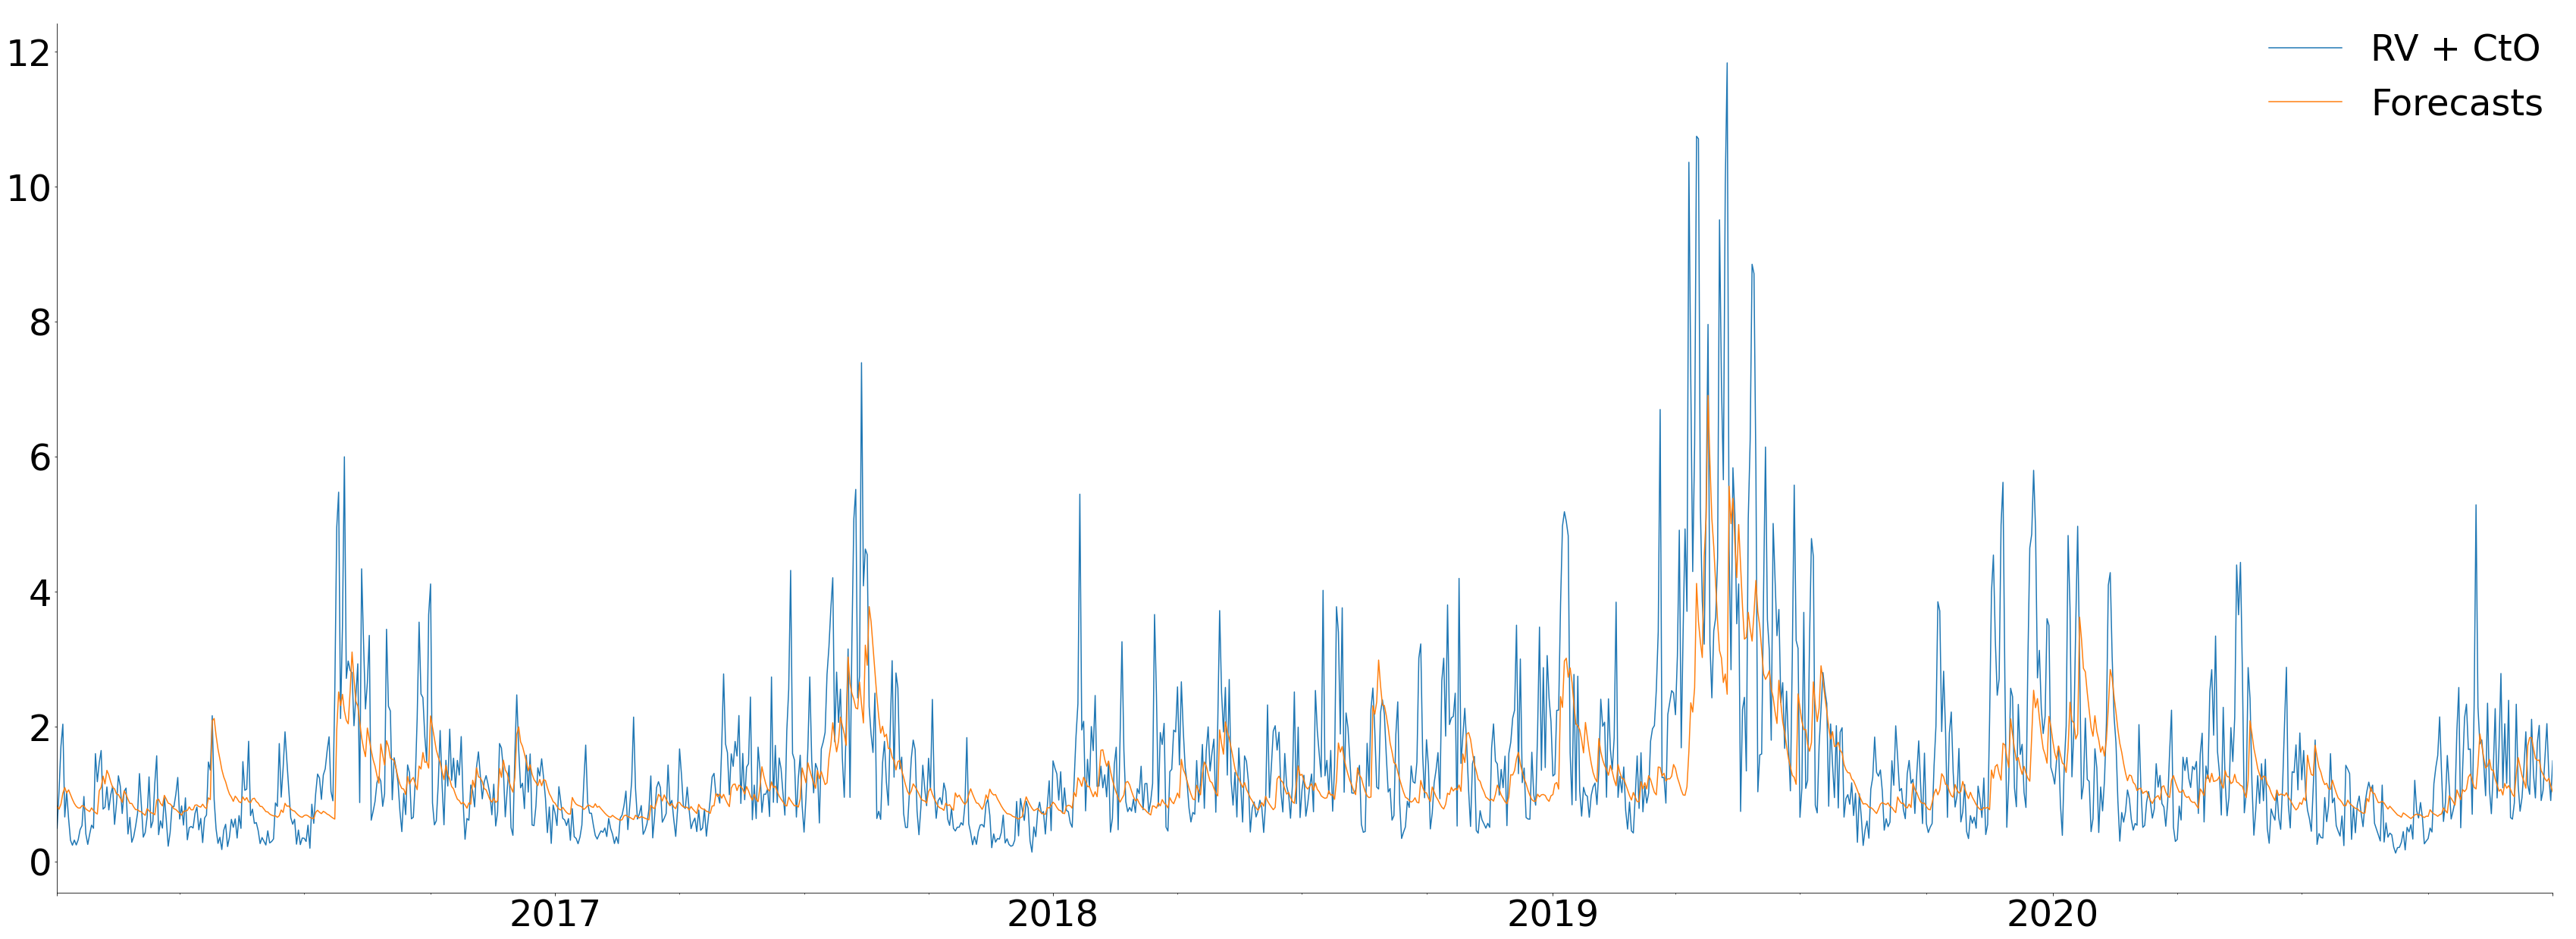

In [351]:
# Question 5, GJR-GARCH model ### Probably better to go without the asymmetry

gjr = arch_model(daily_rets, vol='garch',dist='normal',o=1).fit(last_obs=half-1,disp="off")
forecasts = gjr.forecast(horizon=22, start=half).variance.dropna()
comb = pd.concat([rv[20]+cto, forecasts['h.01']], 1).dropna()
comb.columns = ["RV + CtO", "Forecasts"]
plot(comb)
gjr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1837.23
Distribution:                  Normal   AIC:                           3680.45
Method:            Maximum Likelihood   BIC:                           3695.97
                                        No. Observations:                 1303
Date:                Mon, Mar 15 2021   Df Residuals:                     1303
Time:                        16:46:36   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.1863  3.936e-02      4.733  2.210e-06 [  0.109,  0.263]
alpha[1]       0.4907  5.016e-02      9.782  1.348e-22 [  0.392,  0.589]
beta[1]        0.3371  7.705e-02      4.375  1.213e-05 [  0.186,  0.488]
========================================================================

Covariance estimator: robust
"""

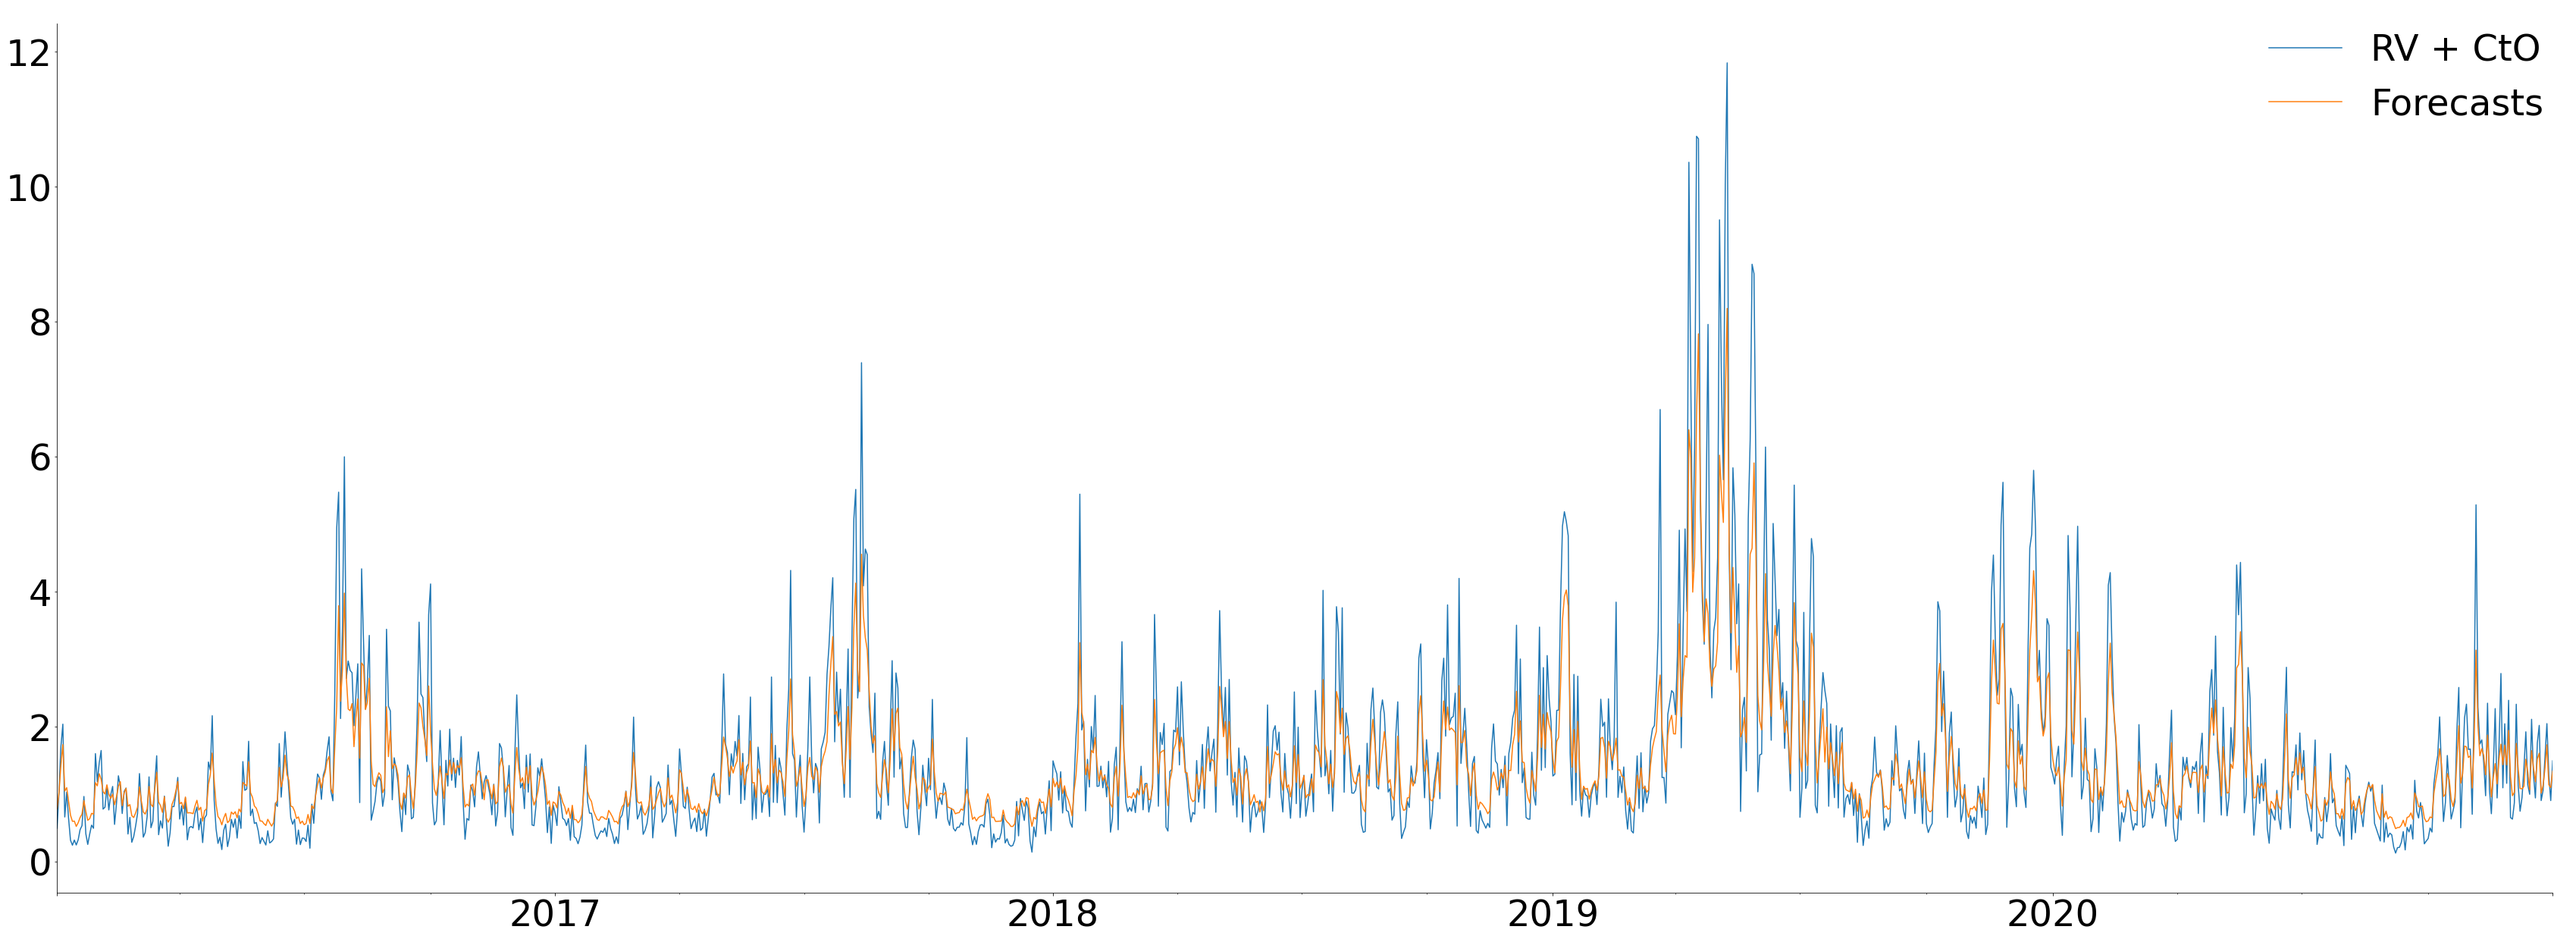

In [352]:
# Question 6: model constructed from pseudo returns: Multiplicative Errror Model

mem = arch_model(np.sign(daily_rets)*np.sqrt(rv[20])["2011-01-04":],dist='normal',mean="Zero").fit(last_obs=half-1,disp="off")
forecasts = mem.forecast(horizon=22, start=half).variance.dropna()
comb = pd.concat([rv[20]+cto, forecasts['h.01'] + cto_fcast], 1).dropna()
comb.columns = ["RV + CtO", "Forecasts"]
plot(comb)
mem.summary()

Question 7: evaluation
--

In [272]:
from scipy.stats import norm
import numpy as np
import pandas as pd
from scipy.stats import sem
import statsmodels.api as sm

def diebold_mariano(loss_a, loss_b, nw_bandwidth):
    delta = loss_a - loss_b
    mod = sm.OLS(delta, np.ones_like(delta))
    dm_res = mod.fit(cov_type="HAC", cov_kwds={"maxlags":int(nw_bandwidth)})
    av_diff = float(dm_res.params[0])
    std_err = float(dm_res.bse[0])
    dm_stat = float(av_diff / dm_res.bse[0])

    cv = norm.ppf(0.975)

    if dm_stat < (cv * -1):
        concl = -1
    elif dm_stat > cv :
        concl = 1
    else:
        concl = 0


    return [av_diff, std_err, dm_stat, concl]

def wald_test(res, r):
    stat = res.wald_test(r)
    return pd.DataFrame(
        [[np.round(float(stat.fvalue), 3)], [np.round(stat.pvalue, 3)], [stat.df_num]],
        index=["Stat", "P-value", "Deg of Freedom"],
        columns=["Wald Test Results"],
    )

def mincer_zarnowitz(realization,forecast,generalised=False):
    x = sm.add_constant(forecast)




    res = sm.OLS(realization, x).fit(cov_type="HC0")
    alpha, beta = res.params
    a_bse, b_bse = res.bse
    parameters = pd.Series([alpha,beta],index=["alpha","beta"])
    alpha_t, empty = res.tvalues
    beta_t = (beta - 1)  / b_bse
    indiv_stats = pd.Series([alpha_t,beta_t],index=["alpha","beta"])

    R = np.array([[1,0], [0,1]])
    R = np.eye(2)
    q = np.array([[0],[1]])
    joint_stat = float(res.wald_test((R, q)).statistic)
    pval = res.wald_test(np.eye(2)).pvalue

    return [parameters, indiv_stats, joint_stat,pval]

In [344]:
def wald_test(res, r):
    stat = res.wald_test(r)
    return pd.DataFrame(
        [[np.round(float(stat.fvalue), 3)], [np.round(stat.pvalue, 3)], [stat.df_num]],
        index=["Stat", "P-value", "Deg of Freedom"],
        columns=["Wald Test Results"],
    )

In [24]:
#har_01 = (har.forecast(align="target").mean.squeeze() + cto.squeeze()).dropna()

In [353]:
har_01 = (har.forecast(align="target").mean.squeeze()).dropna()#+ cto_fcast.squeeze()).dropna()
har_05 = (har.forecast(align="target",horizon=5).mean["h.5"].squeeze()).dropna()# + cto_fcast_5.squeeze()).dropna()
har_22 = (har.forecast(align="target",horizon=22).mean["h.22"].squeeze()).dropna()# + cto_fcast_22.squeeze()).dropna()

gar_01 = garch.forecast(align="target").variance.dropna().squeeze()
gar_05 = garch.forecast(align="target",horizon=5).variance["h.5"].dropna().squeeze()
gar_22 = garch.forecast(align="target",horizon=22).variance["h.22"].dropna().squeeze()

mem_01 = (mem.forecast(align="target").variance.squeeze()).dropna()# + cto_fcast.squeeze()).dropna()
mem_05 = (mem.forecast(align="target",horizon=5).variance["h.5"].squeeze()).dropna()# + cto_fcast_5.squeeze()).dropna()
mem_22 = (mem.forecast(align="target",horizon=22).variance["h.22"].squeeze()).dropna()# + cto_fcast_22.squeeze()).dropna()

realisations = ((rv[20] + cto)[half:]).squeeze()

In [354]:
har_01_errors = (har_01.subtract(realisations,axis=0)).dropna().squeeze()
har_01_losses = har_01_errors ** 2
har_01_mz = mincer_zarnowitz(realisations,har_01)
har_05_errors = (har_05.subtract(realisations,axis=0)).dropna().squeeze()
har_05_losses = har_05_errors ** 2
har_05_mz = mincer_zarnowitz(realisations["2016-01-07":],har_05)
har_22_errors = (har_22.subtract(realisations,axis=0)).dropna().squeeze()
har_22_losses = har_22_errors ** 2
har_22_mz = mincer_zarnowitz(realisations["2016-02-01":],har_22)

gar_01_errors = (gar_01.subtract(realisations,axis=0)).dropna().squeeze()
gar_01_mz = mincer_zarnowitz(realisations,gar_01)
gar_01_losses = gar_01_errors ** 2
gar_05_errors = (gar_05.subtract(realisations,axis=0)).dropna().squeeze()
gar_05_mz = mincer_zarnowitz(realisations["2016-01-07":],gar_05)
gar_05_losses = gar_05_errors ** 2
gar_22_errors = (gar_22.subtract(realisations,axis=0)).dropna().squeeze()
gar_22_losses = gar_22_errors ** 2
gar_22_mz = mincer_zarnowitz(realisations["2016-02-01":],gar_22)

mem_01_errors = (mem_01.subtract(realisations,axis=0)).dropna().squeeze()
mem_01_losses = mem_01_errors ** 2
mem_01_mz = mincer_zarnowitz(realisations,mem_01)
mem_05_errors = (mem_05.subtract(realisations,axis=0)).dropna().squeeze()
mem_05_losses = mem_05_errors ** 2
mem_05_mz = mincer_zarnowitz(realisations["2016-01-07":],mem_05)
mem_22_errors = (mem_22.subtract(realisations,axis=0)).dropna().squeeze()
mem_22_losses = mem_22_errors ** 2
mem_22_mz = mincer_zarnowitz(realisations["2016-02-01":],mem_22)



In [349]:
har_01

2016-01-01    0.972866
2016-01-04    0.735953
2016-01-05    0.664771
2016-01-06    0.928491
2016-01-07    1.222908
                ...   
2020-12-25    1.088903
2020-12-28    1.317887
2020-12-29    1.537700
2020-12-30    0.913289
2020-12-31    1.017850
Name: h.1, Length: 1305, dtype: float64

In [348]:
gar_01

2016-01-04    0.900160
2016-01-05    0.858076
2016-01-06    0.804644
2016-01-07    0.910160
2016-01-08    1.131635
                ...   
2020-12-25    1.319271
2020-12-28    1.260757
2020-12-29    1.241817
2020-12-30    1.321842
2020-12-31    1.197902
Name: h.1, Length: 1304, dtype: float64

In [212]:
realisations = ((rv[20] + cto)[half:]).squeeze()
realisations

2016-01-01    0.593322
2016-01-04    0.491197
2016-01-05    1.038395
2016-01-06    1.704734
2016-01-07    2.034338
                ...   
2020-12-25    1.538203
2020-12-28    2.042014
2020-12-29    1.283500
2020-12-30    0.901505
2020-12-31    1.490888
Length: 1305, dtype: float64

In [249]:
h1 = har_01.to_numpy()
x = sm.add_constant(har_01) / h1[:, None]
gls = sm.OLS(har_01_errors / h1, x).fit()
wald_test(gls,np.eye(2))

,Wald Test Results
Stat,45.115
P-value,0.000
Deg of Freedom,2.000


In [266]:
res = sm.OLS(har_01_errors,sm.add_constant(har_01)).fit(cov_type="HC0")
#wald_test(res,np.eye(2))

In [275]:
test = res.wald_test(np.eye(2))
test.statistic

array([[72.73447406]])

In [259]:
mincer_zarnowitz(realisations,har_01)

[alpha   -0.164930
 beta     1.292132
 dtype: float64,
 alpha   -3.374641
 beta     8.850427
 dtype: float64,
 73.97455965177642,
 array(0.)]

In [355]:
mz_table  = pd.DataFrame(np.zeros((6,9)))
mz_table.index = ["Alpha","Beta", "Alpha stat","Beta stat", "joint stat","p_value"]
mz_table.columns = ["HAR 1", "HAR 5", 'HAR 22', 'GARCH 1',"GARCH 5", "GARCH 22", "MEM 1", "MEM 5", "MEM 22"]

mz_table_gls = pd.DataFrame(np.zeros((3,9)))
mz_table_gls.index = ["Joint stat","P value", "Deg of Freedom"]
mz_table_gls.columns = ["HAR 1", "HAR 5", 'HAR 22', 'GARCH 1',"GARCH 5", "GARCH 22", "MEM 1", "MEM 5", "MEM 22"]


mz_table.iloc[0,0] = har_01_mz[0][0]
mz_table.iloc[1,0] = har_01_mz[0][1]
mz_table.iloc[2,0] = har_01_mz[1][0]
mz_table.iloc[3,0] = har_01_mz[1][1]
mz_table.iloc[4,0] = har_01_mz[2]
mz_table.iloc[5,0] = har_01_mz[3]

mz_table.iloc[0,1] = har_05_mz[0][0]
mz_table.iloc[1,1] = har_05_mz[0][1]
mz_table.iloc[2,1] = har_05_mz[1][0]
mz_table.iloc[3,1] = har_05_mz[1][1]
mz_table.iloc[4,1] = har_05_mz[2]
mz_table.iloc[5,1] = har_05_mz[3]

mz_table.iloc[0,2] = har_22_mz[0][0]
mz_table.iloc[1,2] = har_22_mz[0][1]
mz_table.iloc[2,2] = har_22_mz[1][0]
mz_table.iloc[3,2] = har_22_mz[1][1]
mz_table.iloc[4,2] = har_22_mz[2]
mz_table.iloc[5,2] = har_22_mz[3]

mz_table.iloc[0,3] = gar_01_mz[0][0]
mz_table.iloc[1,3] = gar_01_mz[0][1]
mz_table.iloc[2,3] = gar_01_mz[1][0]
mz_table.iloc[3,3] = gar_01_mz[1][1]
mz_table.iloc[4,3] = gar_01_mz[2]
mz_table.iloc[5,3] = gar_01_mz[3]

mz_table.iloc[0,4] = gar_05_mz[0][0]
mz_table.iloc[1,4] = gar_05_mz[0][1]
mz_table.iloc[2,4] = gar_05_mz[1][0]
mz_table.iloc[3,4] = gar_05_mz[1][1]
mz_table.iloc[4,4] = gar_05_mz[2]
mz_table.iloc[5,4] = gar_05_mz[3]

mz_table.iloc[0,5] = gar_22_mz[0][0]
mz_table.iloc[1,5] = gar_22_mz[0][1]
mz_table.iloc[2,5] = gar_22_mz[1][0]
mz_table.iloc[3,5] = gar_22_mz[1][1]
mz_table.iloc[4,5] = gar_22_mz[2]
mz_table.iloc[5,5] = gar_22_mz[3]

mz_table.iloc[0,6] = mem_01_mz[0][0]
mz_table.iloc[1,6] = mem_01_mz[0][1]
mz_table.iloc[2,6] = mem_01_mz[1][0]
mz_table.iloc[3,6] = mem_01_mz[1][1]
mz_table.iloc[4,6] = mem_01_mz[2]
mz_table.iloc[5,6] = mem_01_mz[3]

mz_table.iloc[0,7] = mem_05_mz[0][0]
mz_table.iloc[1,7] = mem_05_mz[0][1]
mz_table.iloc[2,7] = mem_05_mz[1][0]
mz_table.iloc[3,7] = mem_05_mz[1][1]
mz_table.iloc[4,7] = mem_05_mz[2]
mz_table.iloc[5,7] = mem_05_mz[3]

mz_table.iloc[0,8] = mem_22_mz[0][0]
mz_table.iloc[1,8] = mem_22_mz[0][1]
mz_table.iloc[2,8] = mem_22_mz[1][0]
mz_table.iloc[3,8] = mem_22_mz[1][1]
mz_table.iloc[4,8] = mem_22_mz[2]
mz_table.iloc[5,8] = mem_22_mz[3]



In [278]:
mincer_zarnowitz(realisations["2016-02-01":],mem_22)

[alpha   -24.630371
 beta     23.972013
 dtype: float64,
 alpha   -7.660715
 beta     7.755362
 dtype: float64,
 145.5242479792223,
 array(0.)]

In [357]:
np.round(mz_table,3)

,HAR 1,HAR 5,HAR 22,GARCH 1,GARCH 5,GARCH 22,MEM 1,MEM 5,MEM 22
Alpha,-0.165,-0.281,-0.341,0.255,0.110,-1.197,-0.017,-0.419,-26.701
Beta,1.292,1.468,1.659,0.962,1.130,2.443,1.171,1.620,25.975
Alpha stat,-1.879,-2.102,-1.720,2.418,0.837,-2.488,-0.193,-2.804,-7.691
Beta stat,3.701,3.775,3.508,-0.401,1.120,3.278,2.198,4.475,7.780
joint stat,72.734,84.647,122.278,64.376,70.046,120.987,73.024,90.233,148.167
p_value,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## setup of forecast dataframe
har_forecasts = forecasts #np.exp(fcasts.mean + fcasts.variance/2)
garch_forecasts = garch.forecast(horizon=22, start=half,align="target").variance.dropna()
mem_forecasts = mem.forecast(horizon=22, start=half,align="target").variance.dropna()

comb_forecasts = pd.concat([har_forecasts['h.01'] +cto, har_forecasts['h.05']+ cto ,har_forecasts['h.22'] + cto, garch_forecasts['h.01'], garch_forecasts['h.05'],garch_forecasts['h.22'], mem_forecasts['h.01'] +cto, mem_forecasts['h.05']+ cto ,mem_forecasts['h.22'] + cto], 1).dropna()
comb_forecasts.columns = ["HAR 1", "HAR 5", "HAR 22", "GARCH 1", "GARCH 5", "GARCH 22", "MEM 1", "MEM 5", "MEM 22"]
realisations = (rv[20] + cto)[half:]
errors = comb_forecasts.subtract(realisations,axis=0)

mz_table

#Mincer Zarnowitz
mz_results = {}

for col in comb_forecasts:
    mz_results[col] = mincer_zarnowitz(realisations,comb_forecasts[col])

mz_table  = pd.DataFrame(np.zeros((6,9)))
mz_table.index = ["Alpha","Beta", "Alpha stat","Beta stat", "joint stat","p_value"]
mz_table.columns = ["HAR 1", "HAR 5", 'HAR 22', 'GARCH 1',"GARCH 5", "GARCH 22", "MEM 1", "MEM 5", "MEM 22"]



mz_table[0]

for col in mz_table:
    mz_table[col][0] = mz_results[col][0][0]
    mz_table[col][1] = mz_results[col][0][1]
    mz_table[col][2] = mz_results[col][1][0]
    mz_table[col][3] = mz_results[col][1][1]
    mz_table[col][4] = mz_results[col][2]


In [31]:
print("hello")

hello


Q7: Diebold Mariano: relative forecast evaluation
--

In [40]:
nw = (len(har_01_errors)**(1/3))
diebold_mariano(mem_01_losses, gar_01_losses, nw)

[-21.56892796226132, 10.073964222727666, -2.1410566372272894, -1]

In [39]:
gar_01_losses

2016-01-01    0.001537
2016-01-04    0.007269
2016-01-05    0.004788
2016-01-06    0.907759
2016-01-07    2.071261
                ...   
2020-12-25    0.004848
2020-12-28    0.494760
2020-12-29    0.000122
2020-12-30    0.001945
2020-12-31    0.050714
Name: h.1, Length: 1305, dtype: float64

In [34]:
har_01_losses

2016-01-01    0.028834
2016-01-04    0.010221
2016-01-05    0.018389
2016-01-06    0.357614
2016-01-07    0.433433
                ...   
2020-12-25    0.036151
2020-12-28    0.272782
2020-12-29    0.776181
2020-12-30    0.000005
2020-12-31    0.034680
Length: 1305, dtype: float64